In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.systems.lorenz63 import Lorenz63
from src.solvers.explicit import ForwardEulerSolver
from src.methods.image_point import ImagePointAdvector 

import demos.plotters as plotters

## Getting Reference Solution

This could be high resolution model or observations.

In [2]:
# Initialise the Lorenz 63 system - this is the 'high resolution' model.
model = Lorenz63()

# Setup the solver.
endtime = 100
dt = 0.01 
nt = int(endtime/dt)
solver = ForwardEulerSolver(model.force, endtime, nt)

# Run the solver starting from initial condition.
x0 = np.array([-4.32, -6.0, 18.34])
solver.run(x0)

The solution trajectories (left) and vector field (right) shown below.

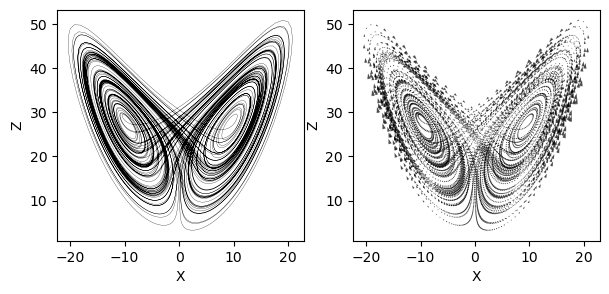

In [3]:
plotters.trajectory_and_vector_subplots(solver)

## Advection of the Image Point

Advect the image point using the vector field calculated from the previous reference solution.

In [4]:
# Initialise the image point advector.
N = 10 
x_ref = solver.xs
advector = ImagePointAdvector(x_ref, model.force, N)

# Setup the solver.
endtime = 0.5
dt = 0.01
nt = int(endtime/dt)
solver_adv = ForwardEulerSolver(advector.force, endtime, nt)

# Run the solver.
y0 = x0.copy()
solver_adv.run(y0)

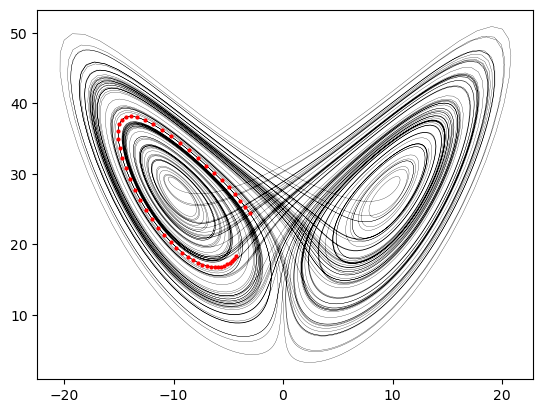

In [5]:
plotters.plot_trajectory_with_ref(solver_adv, x_ref)

## Advection of the Image Point with Nudging

Add nudging to previous method.

In [7]:
# Initialise image point advector.
N = 10 
x_ref = solver.xs
advector = ImagePointAdvector(solver.xs, model.force, N, eta=1, nudge=True)

# Setup the solver.
endtime = 0.5
dt = 0.01
nt = int(endtime/dt)
solver_adv = ForwardEulerSolver(advector.force, endtime, nt)

# Run the solver.
y0 = x0.copy()
solver_adv.run(y0)

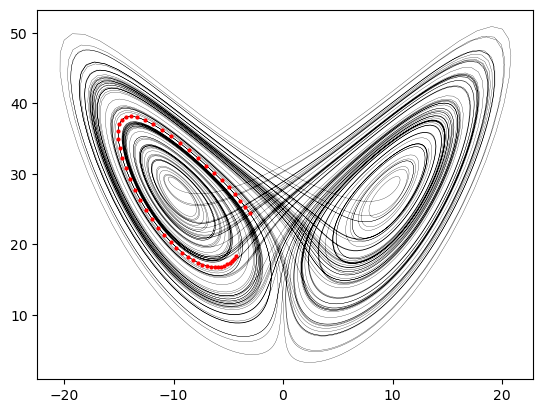

In [8]:
plotters.plot_trajectory_with_ref(solver_adv, x_ref)

## Need some metrics